In [ ]:
import numpy as np
def numerical_diff(f,w):
  h=1e-4
  return (f(w+h)-f(w-h))/(2*h)

In [ ]:
def function_tmp1(w0):
  return w0*w0+2.0**2
def function_tmp2(w1):
  return 1.0**2 +w1*w1

In [ ]:
print("w0에 대한 편미분",numerical_diff(function_tmp1, 1.0))# w0에 대한 편미분
print("w1에 대한 편미분",numerical_diff(function_tmp2, 2.0)) # w1에 대한 편미분

w0에 대한 편미분 1.9999999999997797
w1에 대한 편미분 4.000000000004


In [ ]:
!git clone https://github.com/WegraLee/deep-learning-from-scratch.git # 한국인 저자의 밑바닥딥러닝 깃허브 클론해오기

Cloning into 'deep-learning-from-scratch'...
remote: Enumerating objects: 826, done.
remote: Total 826 (delta 0), reused 0 (delta 0), pack-reused 826
Receiving objects: 100% (826/826), 52.21 MiB | 22.60 MiB/s, done.
Resolving deltas: 100% (477/477), done.


In [ ]:
!pwd 

/content/deep-learning-from-scratch/ch04


In [ ]:
cd deep-learning-from-scratch/ch04 

/content/deep-learning-from-scratch/ch04/deep-learning-from-scratch/ch04


## 4.5 학습알고리즘 구현하기

신경망 학습의 순서를 확인해보자.

### 전체  
 신경망에는 적용 가능한 가중치와 편향이 있고, 이 가중치(weight)와 편향(bias)을 훈련 데이터(training data)에 적용하도록 조정하는 과정을 학습이라고 한다.  
  신경망은 4단계를 거쳐서 학습이 된다.

1.    __미니배치(mini batch):__ 훈련데이터 중 일부를 무작위로 가져온다. 이렇게 선별한 데이터를 미니배치라고 하고 미니배치의 손실함수 값을 줄이는 것이 목표이다.
2.   __기울기 산출__:미니배치의 손실함수 값을 줄이기 위해서 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실함수의 값을 가장 작게하는 방향을 제시한다.

3.  __매개변수 갱신__: 가중치 매개변수를 기울기 방향으로 아주 조금 갱신합니다.

4. __반복__: 1~3단계를 반복한다.



데이터를 미니배치로 무작위로 선정하기 때문에 __확률적 경사 하강법(SGD,Stochastic Gradient Descent)__라고 부른다. 

![](https://github.com/Asunny2019/Deeplearning_from_scratch/blob/main/Deeplearning_from_scratch1/img/ch4_5.jpg?raw=true)

[출처: Mini batch SGD가 무슨 의미일까요?](https://youtu.be/w_hugN_fv2M)
![](https://github.com/Asunny2019/Deeplearning_from_scratch/blob/main/Deeplearning_from_scratch1/img/ch4_6_SGD_2.jpg?raw=true)

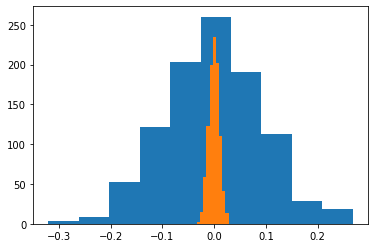

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(10) # 랜덤함수의 seed
a= 0.1 * np.random.randn(1000)
b= 0.01 * np.random.randn(1000)

plt.hist(a)
plt.hist(b)

plt.show()

In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치와 편향을 초기화한다. input_size: 데이터의 feature, 
        #hidden_size: hidden layer의 개수(일단은 임의의 값, 나중에는 학습이 잘 되게 하기 위해 찾아내야하는 값), 
        #output_size: 출력 할때 클래스 개수(mnist의 경우 10개), 
        # weight_init_std는 W1과 W2의 np.random.randn함수를 이해할 필요가 있다. 
        # 이 함수는 정규분포를 띄는 값을 계산해준다.
        #https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size) #레이어1 의 가중치
        self.params['b1'] = np.zeros(hidden_size) # 레이어 1의 편향(bias)0
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)#레이어2 의 가중치
        self.params['b2'] = np.zeros(output_size) # 레이어 2의 편향(bias)

    def predict(self, x): # 예측 수행
        W1, W2 = self.params['W1'], self.params['W2'] # 레이어 1,2의 가중치
        b1, b2 = self.params['b1'], self.params['b2'] # 레이어 1,2의 편향
    
        a1 = np.dot(x, W1) + b1 # 레이어1의 가중치와 편향으로 계산한 값 a1 
        z1 = sigmoid(a1) # a1을 시그모이드- 활성화함수(activation function)을 적용한 값
        a2 = np.dot(z1, W2) + b2 #  z1의 결과값을 입력데이터로 받아와서 레이어2에서 w2와 계산한다.
        y = softmax(a2) # a2를 소프트맥스-활성화함수를 적용한 값
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)  # 입력 데이터x를 통해 예측한 값 y
        
        return cross_entropy_error(y, t)
        # y와 정답 레이블 t(ground truth)를 손실함수 cross entropy 사용하여
        # 둘 사이의 에러가 얼마나 되는지 비교한다.
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        # softmax를 거쳐서 예측한 값 y에서 가장 큰 값이 있는 클래스가 정답일 가능성이 가장 높으므로 해당 인덱스를 정답으로 간주하여서
        accuracy = np.sum(y == t) / float(x.shape[0]) # 비교한다.
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t): # 가중치 매개변수의 기울기를 구한다.
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads


TwoLayerNet 클래스는 딕셔너리인 params와 grads를 인스턴스 변수로 갖습니다. params 변수에는 가중치 매개변수가 저장된다. params 변수에는 이 신경망에 필요한 매개변수가 모두 저장된다. 그리고 params 변수에 저장된 가중치 매개 변수가 순방향으로 예측 처리에서 사용된다. 

In [ ]:
net=TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [ ]:
x=np.random.rand(100,784)# 더미 입력데이터 100장분량
t=np.random.rand(100,10) # 더미 정답데이터 100장분량
grads=net.numerical_gradient(x,t) 
#대략 3분 정도 걸림
# 각 매개변수의 기울기를 계산한다. 수치미분으로 각 매개변수의 기울기를 계산한다.
print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


## 4.5.2미니배치 학습구현하기 

신경망 학습 구현에는 앞에서 설명한 

In [ ]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 100  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()



ModuleNotFoundError: ignored

매번 60000개의 훈련데이터에서 임의로 100개의 데이터(이미지 데이터와 정답 레이브 데이터)를 추려냅니다. 그리고 100개의 미니배치를 대상으로 확률적 경사하강법을 수행하여 매개변수(parameter)를 갱신한다. 경사하강법에 의한 갱신횟수를 10000번으로 설정하고 갱신할때마다 훈련데이터에 대한 손실함수를 계산하고 그 값을 배열에 추가한다. 그 손실함수의 변화의 추이를 그래프로 나타낸다. 

4.5.3 시험데이터로 평가하기 